# Customer Decision Making Model - Churn Model

# SVM

In [1]:
import pandas  as pd                                   #  For data handling
from sklearn.model_selection import train_test_split   #  To split train/test
from sklearn.svm import SVC                            #  For SVM
from sklearn.metrics import accuracy_score             #  Accuracy
from sklearn.metrics import confusion_matrix           #  confusion matrix
from sklearn import metrics                            #  & other metrics     #  For DT


In [2]:
import matplotlib.pyplot as plt

In [55]:
churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv') #from kaggle 

<h1>Telco Dataset = Customers who left within the last month </h1>
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.<br>
<br>
<b>The data set includes information about:</b><br>

Customers who left within the last month – the column is called Churn<br>
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies<br>
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges<br>
Demographic info about customers – gender, age range, and if they have partners and dependents<br>

In [56]:
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


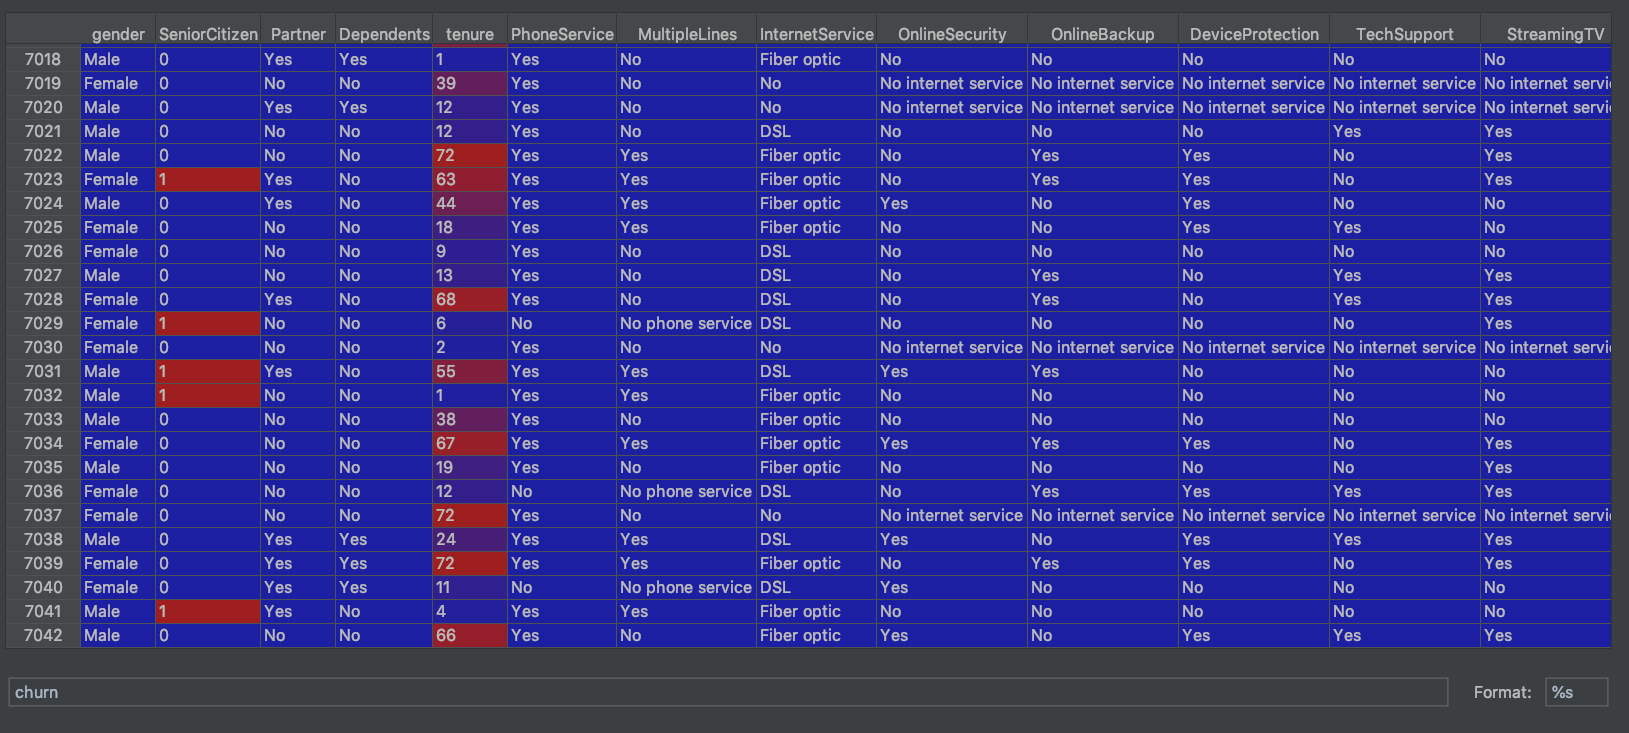

<h1>Explolatory Data Analysis

In [5]:
churn.shape

(7043, 21)

In [6]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
#checking the data types

In [9]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
# WHY IS 19  TotalCharges      7043 non-null   object  not numeric

In [11]:
churn["TotalCharges"].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [12]:
#freq 11 ?? Missing values maybe

In [13]:
churn["MonthlyCharges"].describe() #continous variables look like this

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [14]:
churn["PaymentMethod"].describe()

count                 7043
unique                   4
top       Electronic check
freq                  2365
Name: PaymentMethod, dtype: object

In [15]:
#freq 2365 this is how it should look

<h2> There are 11 empty entries in Total Charges  and its a string

In [16]:
churn["TotalCharges"].isna().sum()

0

In [57]:
(churn["TotalCharges"]==" ").sum()

11

# Visualizing the data

In [18]:
import matplotlib.pyplot as plt   # For plotting graphs
import matplotlib.ticker as mtick # For specifying axes ticks
import seaborn           as sns   # For interactive plots
import os

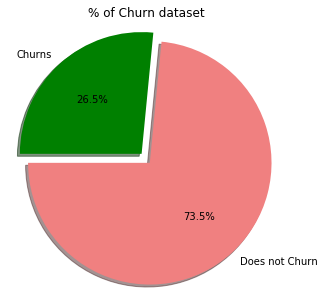

In [19]:
sizes   = churn['Churn'].value_counts(sort = True)
labels  = 'Does not Churn', 'Churns'
colors  = ['lightcoral', 'green']
explode = (0.1, 0)  # explode Churns



fig     = plt.figure(figsize =(5,5))
#plt.figure(figsize =(5,5))
plt.pie(sizes, 
        labels=labels, 
        colors=colors,
        explode=explode,
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=-180)

plt.axis('equal')
plt.title('% of Churn dataset')
plt.grid()
plt.show()
#fig.savefig('Churn_pi-chart.pdf')

In [20]:
#Tenure Relationship to Churn

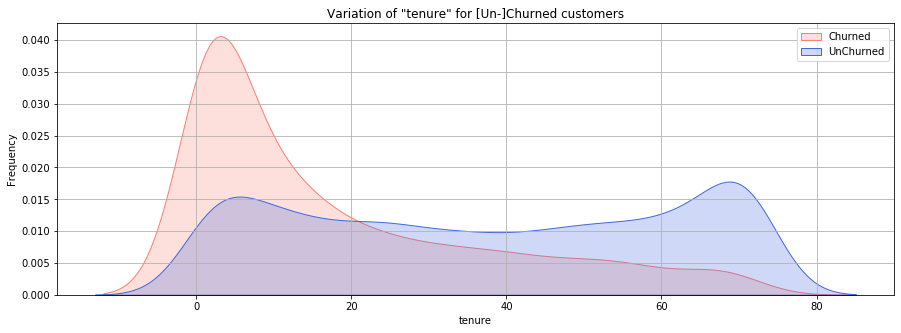

In [21]:
fig= plt.figure(figsize= (15,5))
ax = sns.kdeplot(churn.tenure[(churn["Churn"] == 'Yes') ], 
                color="salmon", shade = True)
ax = sns.kdeplot(churn.tenure[(churn["Churn"] == 'No') ], 
                ax=ax, color="royalblue", shade= True)

ax.set_xlabel("tenure")
ax.set_ylabel("Frequency")
plt.title('Variation of "tenure" for [Un-]Churned customers')
plt.grid()
ax = ax.legend(["Churned","UnChurned"])
#fig.savefig('Churn_tenure_density-plot.pdf')

In [22]:
#Mothly Chargers Relationship to Churn

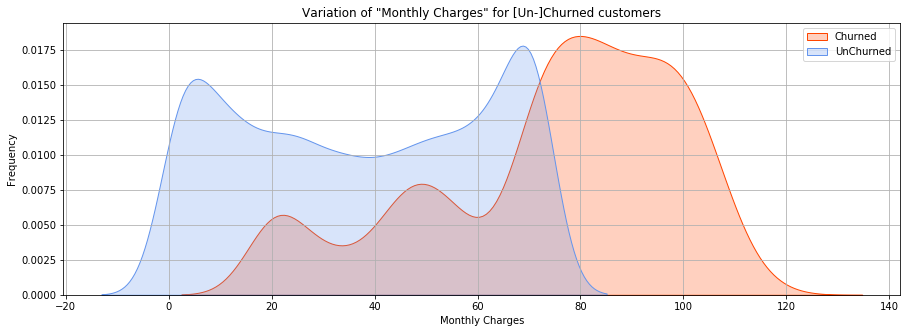

In [23]:
fig= plt.figure(figsize= (15,5))
ax = sns.kdeplot(churn.MonthlyCharges[(churn["Churn"] == 'Yes') ], 
                color="orangered", shade = True)
ax = sns.kdeplot(churn.tenure[(churn["Churn"] == 'No') ], 
                ax=ax, color="cornflowerblue", shade= True)
ax.set_xlabel("Monthly Charges")
ax.set_ylabel("Frequency")
plt.title('Variation of "Monthly Charges" for [Un-]Churned customers')
ax = ax.legend(["Churned","UnChurned"])
plt.grid()
#fig.savefig('Churn_MnthlyChrgs_density-plot.pdf')

In [24]:
#Total Charges Relationship to Churn

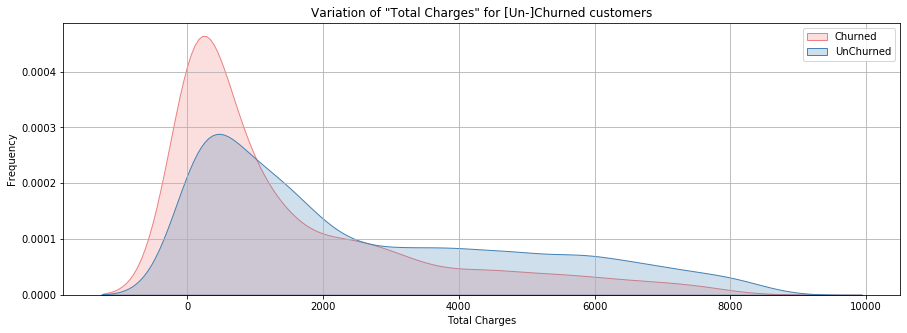

In [60]:
fig= plt.figure(figsize= (15,5))
ax = sns.kdeplot(churn.TotalCharges[(churn["Churn"] == 'Yes') ], 
                color="lightcoral", shade = True)
ax = sns.kdeplot(churn.TotalCharges[(churn["Churn"] == 'No') ], 
                ax=ax, color="steelblue", shade= True)
ax.set_xlabel("Total Charges")
ax.set_ylabel("Frequency")
plt.title('Variation of "Total Charges" for [Un-]Churned customers')
ax = ax.legend(["Churned","UnChurned"])
plt.grid()
#fig.savefig('Churn_TotalChrgs_density-plot.pdf')

In [ ]:
churn["TotalCharges"][churn["Churn"]=="Yes"].describe()

In [ ]:
#relationship if Senior Citizen

<Figure size 1080x360 with 0 Axes>

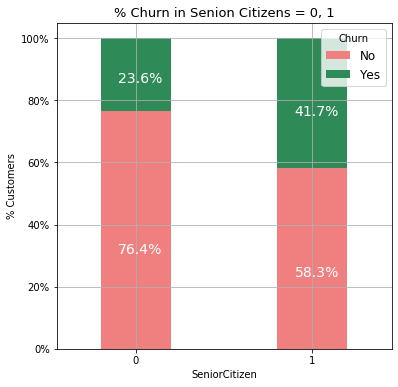

In [26]:
colors = ['lightcoral','seagreen']
churn_sczn = churn.groupby(['SeniorCitizen','Churn']).size().unstack()
fig= plt.figure(figsize= (15,5))

ax = (churn_sczn.T*100.0/ 
      churn_sczn.T.sum()).T.plot(kind='bar',
                                 width = 0.4,
                                 stacked = True,
                                 rot = 0, 
                                 figsize = (6,6),
                                 color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='upper right',prop={'size':12},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('% Churn in Senion Citizens = 0, 1',size = 13)

# Add data labels to the bar diagram
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.1f}%'.format(height), 
                (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
                weight = 'normal',
                size =14)
plt.grid()
#fig.savefig('Churn_Sen-Cit_stacked-bar.pdf')

<H1> Take aways

<b> Only 26% Customers are churning<br>
Customers with low tenure are churning <br>
Customers more than Dollar 80 Monthly Charge are churning <br>
Total charges that churn are around Dollar 1500 <br>
Senior Citizons are churning at double compared to non senior<br> </b>

In [27]:
churn["TotalCharges"][churn["Churn"]=="Yes"].describe()

count     1869
unique    1732
top       20.2
freq         6
Name: TotalCharges, dtype: object

# Check for Imbalance Data

In [28]:
churn["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

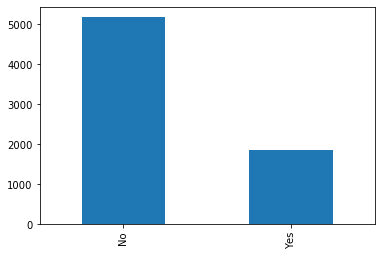

In [29]:
churn["Churn"].value_counts().plot(kind="bar")

In [30]:
dist=churn["Churn"].value_counts()

In [31]:
ratio = dist / dist.sum()
ratio

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [32]:
#kind of ok not extreme 

In [58]:
churn["TotalCharges"]=churn["TotalCharges"].replace(" ",0)
churn["TotalCharges"]=churn["TotalCharges"].astype(float)

In [59]:
churn["TotalCharges"].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

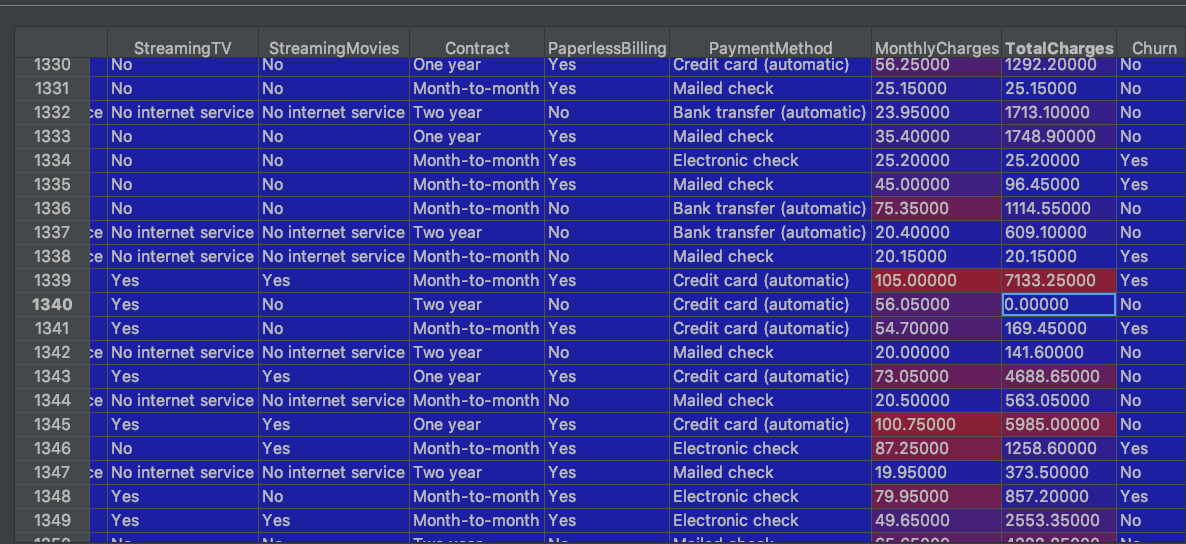

In [35]:
churn["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

# Categorical Data

In [36]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [37]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [38]:
churn["gender"].replace({'Male': 0, 'Female': 1})

0       1
1       0
2       0
3       0
4       1
       ..
7038    0
7039    1
7040    1
7041    0
7042    0
Name: gender, Length: 7043, dtype: int64

In [39]:
churn["gender"].map({'Male': 0, 'Female': 1})

0       1
1       0
2       0
3       0
4       1
       ..
7038    0
7039    1
7040    1
7041    0
7042    0
Name: gender, Length: 7043, dtype: int64

In [40]:
#create another DF

In [61]:
churnum = churn.copy()

In [62]:
map_num = {"gender":           {"Male":1, "Female": 0},
           "Partner":          {"Yes": 1,  "No": 0},
           "Dependents":       {"Yes": 1,  "No": 0},
           "PhoneService":     {"Yes": 1,  "No": 0},
           "MultipleLines":    {"Yes": 2,  "No": 1, "No phone service": 0},
           "InternetService":  {"Fiber optic"  : 2,   "DSL": 1,   "No": 0},
           "OnlineSecurity":   {"Yes": 2,  "No": 1, "No internet service": 0},
           "OnlineBackup":     {"Yes": 2,  "No": 1, "No internet service": 0},
           "DeviceProtection": {"Yes": 2,  "No": 1, "No internet service": 0},
           "TechSupport":      {"Yes": 2,  "No": 1, "No internet service": 0},
           "StreamingTV":      {"Yes": 2,  "No": 1, "No internet service": 0},
           "StreamingMovies":  {"Yes": 2,  "No": 1, "No internet service": 0},
           "Contract":         {"Month-to-month": 1,
                                "One year"      : 12,
                                "Two year"      : 24},
           "PaperlessBilling": {"Yes": 1,  "No": 0},
           "PaymentMethod":    {"Electronic check"          : 1,
                                "Mailed check"              : 0,
                                "Bank transfer (automatic)" : 2,
                                "Credit card (automatic)"   : 3},
           "Churn":            {"Yes": 1,  "No": 0}
          }

In [63]:
churnum.replace(map_num, inplace=True)

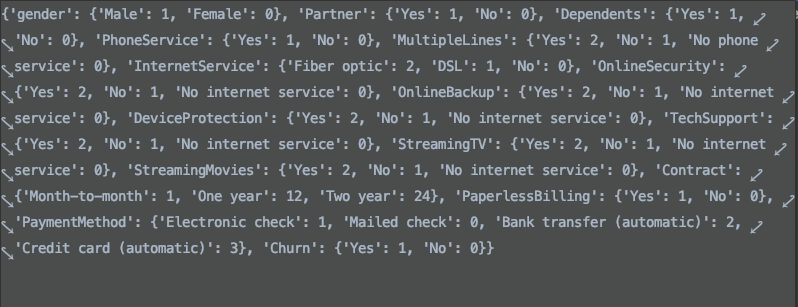

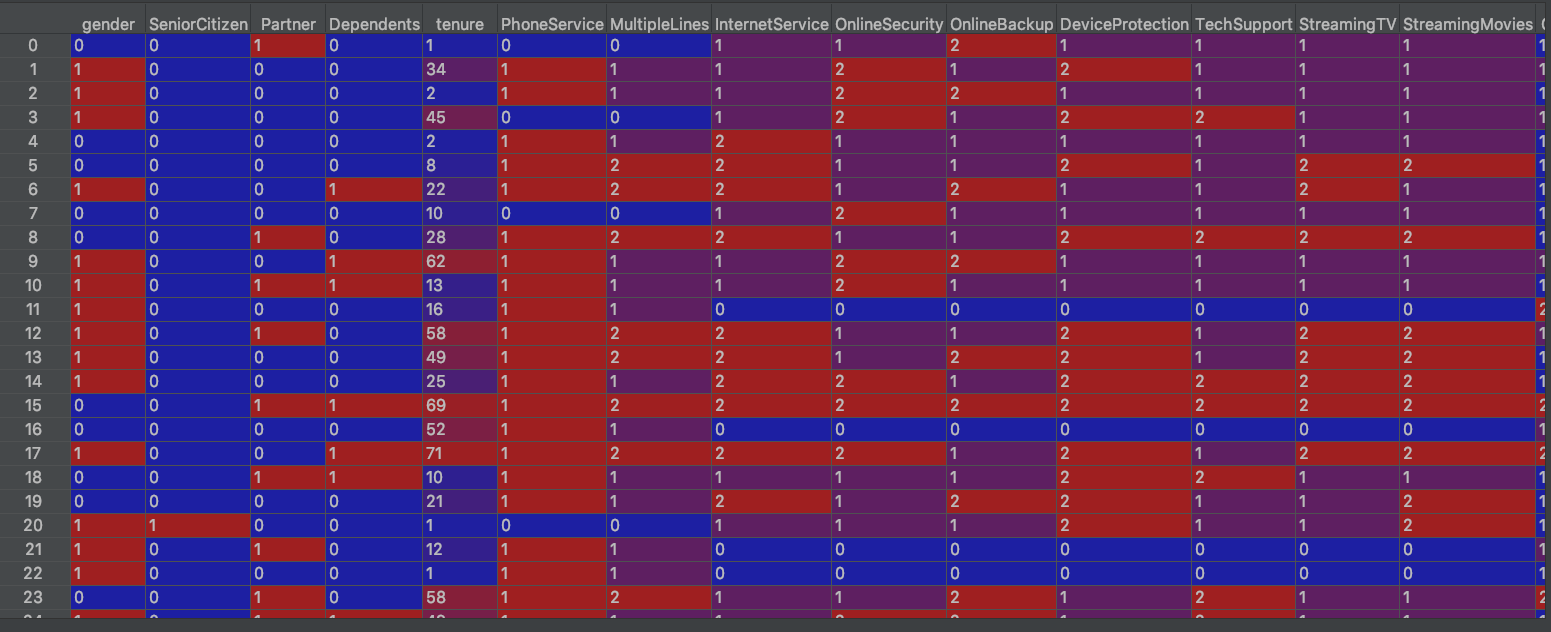

In [64]:
churnum=churnum.drop(columns="customerID")

In [65]:
churnum

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,1,2,1,1,1,1,1,1,1,29.85,29.85,0
1,1,0,0,0,34,1,1,1,2,1,2,1,1,1,12,0,0,56.95,1889.50,0
2,1,0,0,0,2,1,1,1,2,2,1,1,1,1,1,1,0,53.85,108.15,1
3,1,0,0,0,45,0,0,1,2,1,2,2,1,1,12,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,1,2,1,1,1,1,1,1,1,1,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,1,2,1,2,2,2,2,12,1,0,84.80,1990.50,0
7039,0,0,1,1,72,1,2,2,1,2,2,1,2,2,12,1,3,103.20,7362.90,0
7040,0,0,1,1,11,0,0,1,2,1,1,1,1,1,1,1,1,29.60,346.45,0
7041,1,1,1,0,4,1,2,2,1,1,1,1,1,1,1,1,0,74.40,306.60,1


# Train Test Split

In [66]:
churnum.shape

(7043, 20)

In [67]:
X=churnum.values[:,:19]
y=churnum.values[:,19]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 39)

In [73]:
churnum

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,1,2,1,1,1,1,1,1,1,29.85,29.85,0
1,1,0,0,0,34,1,1,1,2,1,2,1,1,1,12,0,0,56.95,1889.50,0
2,1,0,0,0,2,1,1,1,2,2,1,1,1,1,1,1,0,53.85,108.15,1
3,1,0,0,0,45,0,0,1,2,1,2,2,1,1,12,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,1,2,1,1,1,1,1,1,1,1,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,1,2,1,2,2,2,2,12,1,0,84.80,1990.50,0
7039,0,0,1,1,72,1,2,2,1,2,2,1,2,2,12,1,3,103.20,7362.90,0
7040,0,0,1,1,11,0,0,1,2,1,1,1,1,1,1,1,1,29.60,346.45,0
7041,1,1,1,0,4,1,2,2,1,1,1,1,1,1,1,1,0,74.40,306.60,1


# Standard scaler

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
scaler = StandardScaler()

In [118]:
scaler.fit(X_train)

StandardScaler()

In [119]:
X_train_scaled=scaler.transform(X_train)

In [120]:
X_test_scaled=scaler.transform(X_test)

In [131]:
X_test_scaled.shape

(1409, 19)

In [132]:
X_test.shape

(1409, 19)

In [142]:
X_test[1]

array([  0.  ,   0.  ,   0.  ,   1.  ,  48.  ,   1.  ,   1.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,  12.  ,   0.  ,
         0.  ,  19.95, 936.7 ])

In [143]:
X_test_scaled[1]

array([-1.01034818, -0.44205987, -0.96854556,  1.52765435,  0.62862565,
        0.32224234, -0.51579692, -1.57467321, -1.51920553, -1.53097305,
       -1.53277944, -1.51940634, -1.54699075, -1.54799864,  0.32846099,
       -1.21108424, -1.34419559, -1.4958904 , -0.59814898])

# BUILDING THE SVM MODEL

In [163]:
model_svm = SVC(kernel='rbf',  ##  ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’  # default is rbf
                degree = 3,  # default
                max_iter = 5000,
                random_state = 39)

model_svm.fit(X_train_scaled, y_train)


## Predict  on  training  &  test  data  sets

y_pren_svm = model_svm.predict(X_train_scaled)
y_pret_svm = model_svm.predict(X_test_scaled)

In [158]:
#SVC? to see parameters

In [159]:
##  Training set results

cm_svm = confusion_matrix(y_train, y_pren_svm)
accu_svm = accuracy_score(y_train, y_pren_svm)
sens_svm = cm_svm[0,0]/float(cm_svm[0,0]+cm_svm[0,1])
spec_svm = cm_svm[1,1]/float(cm_svm[1,0]+cm_svm[1,1])
fpr, tpr, thsld = metrics.roc_curve(y_train, y_pren_svm, pos_label=1)

print ("\n")
print ("Confusion Matrix for SVM_train : \n", cm_svm)
print ("Accuracy for SVM_train is : ", round(accu_svm*100, 2), "%")
print ("Sensitivity for SVM_train = ", round(sens_svm*100, 2), "%")
print ("Specificity for SVM_train = ", round(spec_svm*100, 2), "%")
print ("The AUC-ROC for SVM_train : ", round(metrics.auc(fpr, tpr)*100, 2), "%")



Confusion Matrix for SVM_train : 
 [[3832  307]
 [ 727  768]]
Accuracy for SVM_train is :  81.65 %
Sensitivity for SVM_train =  92.58 %
Specificity for SVM_train =  51.37 %
The AUC-ROC for SVM_train :  71.98 %


In [160]:
X_test.shape

(1409, 19)

In [161]:
##  Test set results

cm_svm = confusion_matrix(y_test, y_pret_svm)
accu_svm = accuracy_score(y_test, y_pret_svm)
sens_svm = cm_svm[0,0]/float(cm_svm[0,0]+cm_svm[0,1])
spec_svm = cm_svm[1,1]/float(cm_svm[1,0]+cm_svm[1,1])
fpr, tpr, thsld = metrics.roc_curve(y_test, y_pret_svm, pos_label=1)

print ("\n")
print ("Confusion Matrix for SVM_test  : \n", cm_svm)
print ("Accuracy for SVM_test is  : ", round(accu_svm*100, 2), "%")
print ("Sensitivity for SVM_test  = ", round(sens_svm*100, 2), "%")
print ("Specificity for SVM_test  = ", round(spec_svm*100, 2), "%")
print ("The AUC-ROC for SVM_test  : ", round(metrics.auc(fpr, tpr)*100, 2), "%")
print ("\n")




Confusion Matrix for SVM_test  : 
 [[941  94]
 [182 192]]
Accuracy for SVM_test is  :  80.41 %
Sensitivity for SVM_test  =  90.92 %
Specificity for SVM_test  =  51.34 %
The AUC-ROC for SVM_test  :  71.13 %




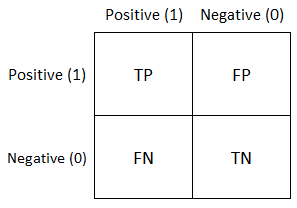

In [162]:
churnum["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [154]:
churnum.shape

(7043, 20)